In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import scipy.optimize as op
import scipy.stats
from scipy.optimize import curve_fit

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import math

In [2]:
def unit(x,y,z):
    M = np.sqrt(x**2 + y**2 + z**2)
    #M=1
    return x/M, z/M,y/M #flipping y and z to project vertically

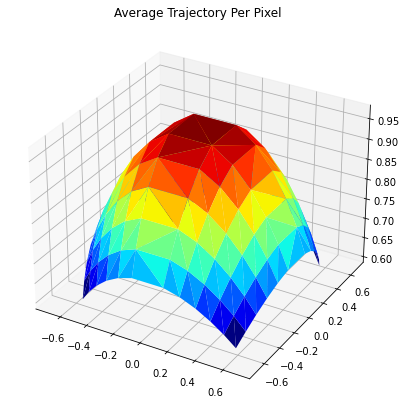

In [8]:
# Modify these 5 variables
num_total_pixels_x = 400 # Sum of x pixels from both detectors
num_total_pixels_y = 400 # Sum of y pixels from both detectors
step = 32 # Step for arange, minimize or maximize computing time
DY = 200.0 # Distance between detectors
PX = 0.5 # Pixel size
##############################################################################################################################

i = np.arange(1,num_total_pixels_x, step) #32 should be 2, this is for general visuals to minimize computing time
j = np.arange(1,num_total_pixels_y, step)

DX = np.zeros((num_total_pixels_x+1, num_total_pixels_y+1))#average direction of incident ray to hit a pixel on the second detector (after passing through first) 
DZ = np.zeros((num_total_pixels_x+1, num_total_pixels_y+1))
for Hpix in i: #for all 480 pixels along the x axis
    for Vpix in j: #for all 120 pixels along the y axis
        dx = 0. #average distance travelled in x to the first detector pixel x,y
        dz = 0. #average distance travelled in y to the first detector pixel x,y
        dy = DY #distance to second detector
        for H in i: #for every pixel on the second detector x axis
            for V in j:#for every pixel on the second detector y axis
                #H,V is pixels on second detector
                #comparing to the H,V pixel on the second detector (the one it passes through first)
                dx = dx+(H-Hpix) #horizontal distance of pixel x,y to H,V (along x axis)
                dz = dz+(V-Vpix) #vertical distance of pixel x,y to H,V (along z axis)
        dx = np.sum(dx)/(len(i)*len(j))#(960*480) #AVERAGE
        dz = np.sum(dz)/(len(i)*len(j))#(960*480) #AVERAGE
        DX[Hpix,Vpix]=dx
        DZ[Hpix,Vpix]=dz

Xvals = []
Yvals = []
Zvals = []
for H in i:
    for V in j:
        if DX[H][V] != 0 and DZ[H][V] != 0:
            x,y,z = unit(DX[H][V], DY, DZ[H][V])
            Xvals.append(x)
            Yvals.append(y)
            Zvals.append(z)
        #print(x)
        #ax.scatter(x,y,z)

        
fig = plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.plot_trisurf(Xvals, Yvals, Zvals, cmap='jet')
ax.set_title('Average Trajectory Per Pixel')
plt.show()

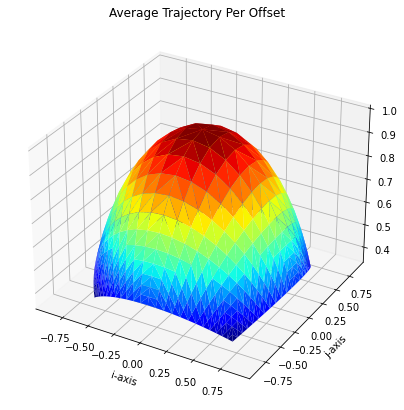

In [9]:
i = np.arange(1,num_total_pixels_x, step) #480 horizontally
j = np.arange(1,num_total_pixels_y, step) #120 vertically

DXY = []
for Hpix in i: #for all 480 pixels along the x axis
    for Vpix in j: #for all 120 pixels along the y axis
        for H in i: #for every pixel on the second detector x axis
            for V in j:#for every pixel on the second detector y axis
                # for every combination of pixels
                dx = Hpix-H #horizontal relative displacement
                dy = Vpix-V #vertical relative displacement
                dxy = [dx,dy] #total displacement
                if dxy not in DXY:
                    DXY.append(dxy)

Xvals = []
Yvals = []
Zvals = []
for i in range(len(DXY)):
    x,y,z = unit(DXY[i][0],DY,DXY[i][1])
    #thetax = math.degrees(math.atan(x/z)) # by angle
    #thetay = math.degrees(math.atan(y/z))
    #Xvals.append(thetax)
    #Yvals.append(thetay)
    Xvals.append(x) #for actual physical offset
    Yvals.append(y)
    Zvals.append(z)
    
fig = plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.plot_trisurf(Xvals,Yvals,Zvals, cmap='jet') 
ax.set_title('Average Trajectory Per Offset')
ax.set_xlabel('i-axis')
ax.set_ylabel('j-axis')
plt.show()

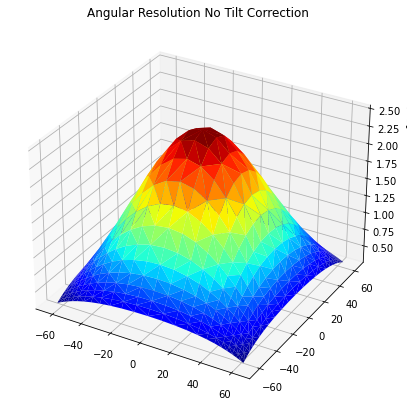

In [10]:
Xvals = []
Yvals = []
SRvals = [] #solid angle
for i in range(len(DXY)):
    x=DXY[i][0]
    y=DXY[i][1]
    z=DY # distance between the detectors
    r = np.sqrt((.5*x)**2 + (.5*y)**2 + (.5*z)**2) # radius of solid angle (from center between pixels to pixel)
    A = PX*PX
    Afix = A #figure out the influence of the titled solid angle
    SR = Afix/r**2
    #Xvals.append(x)
    #Yvals.append(y)
    thetax = math.degrees(math.atan(x/z)) # by angle (and the 1/2 cancels bc similar triangles)
    thetay = math.degrees(math.atan(y/z))
    Xvals.append(thetax)
    Yvals.append(thetay)
    SRvals.append(SR)
    #ax.scatter(x,y,SR)
fig = plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.plot_trisurf(Xvals, Yvals, SRvals, cmap='jet')
#ax.set_xlabel('theta x')
#ax.set_ylabel('theta y')
ax.set_title('Angular Resolution No Tilt Correction');

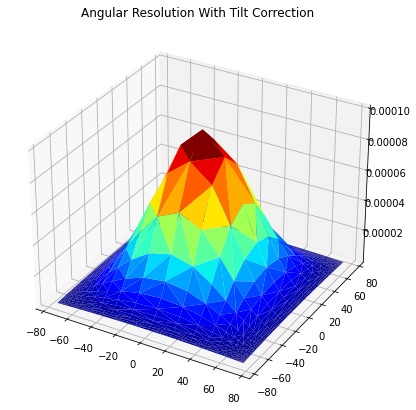

In [11]:
Xvals = []
Yvals = []
SRvals = [] #solid angle
for i in range(len(DXY)):
    x=DXY[i][0]
    y=DXY[i][1]
    z=DY/2 #(half distance between the detectors)
    r = np.sqrt((.5*x)**2 + (.5*y)**2 + (.5*z)**2)
    A = PX*PX
    thetax = math.degrees(math.atan(x/z)) # by angle
    thetay = math.degrees(math.atan(y/z))
    Afix = A*math.cos(math.atan(x/z))*math.cos(math.atan(y/z))
    SR = Afix/r**2
    Xvals.append(thetax)
    Yvals.append(thetay)
    SRvals.append(SR)
    #ax.scatter(x,y,SR)
    
fig = plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.plot_trisurf(Xvals, Yvals, SRvals, cmap='jet')
#ax.set_xlabel('theta x')
#ax.set_ylabel('theta y')
ax.set_title('Angular Resolution With Tilt Correction')
plt.show()

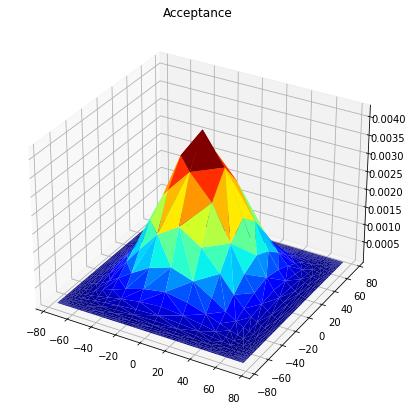

In [12]:
Acc = np.zeros(len(DXY)) #all of the distances (dx,dy i.e. r_mn)
i = np.arange(1,num_total_pixels_x, step) #480 horizontally
j = np.arange(1,num_total_pixels_y, step) #120 vertically
for Hpix in i: #for all 480 pixels along the x axis
    for Vpix in j: #for all 120 pixels along the y axis
        for H in i: #for every pixel on the second detector x axis
            for V in j:#for every pixel on the second detector y axis
                # for every combination of pixels
                dx = Hpix-H #horizontal relative displacement
                dy = Vpix-V #vertical relative displacement
                dxy = [dx,dy] #total displacement
                if dxy in DXY: #So if this displacement exists
                    Acc[DXY.index(dxy)]= Acc[DXY.index(dxy)]+1 #add one count to this displacement

Xvals = []
Yvals = []
Zvals = [] #acceptance (i.e. detection area times angular resolution)
for i in range(len(DXY)):
    x=DXY[i][0]
    y=DXY[i][1]
    AccArea=np.float64(Acc[i])*(PX*PX) #Number of pixel pairs times area of pixels
    Acceptance = AccArea * SRvals[i] #that area times the angular resolutionAccArea = 
    #Xvals.append(x)
    #Yvals.append(y)
    thetax = math.degrees(math.atan(x/z)) # by angle
    thetay = math.degrees(math.atan(y/z))
    Xvals.append(thetax)
    Yvals.append(thetay)
    Zvals.append(Acceptance)
    #ax.scatter(x,y,SR)
    
fig = plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.plot_trisurf(Xvals, Yvals, Zvals, cmap='jet')
plt.title('Acceptance');